In [9]:
import urllib.request
with urllib.request.urlopen("http://deeplearning.net/tutorial/code/utils.py") as url:
    response = url.read()
target = open('utils.py', 'w')
target.write(response.decode('utf-8'))
target.close()

In [24]:
import tensorflow as tf
import numpy
from tensorflow.examples.tutorials.mnist import input_data
#!pip install pillow
from PIL import Image
#from utils.py import tile_raster_images
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#reconstruct the data
vb=tf.constant([0.1,0.2,0.1,0.1,0.1,0.2,0.1])
print("b: ",sess.run(vb))

v_prob = sess.run(tf.nn.sigmoid(tf.matmul(h_state,tf.transpose(w))+vb))

print("p(vi|h): ",v_prob)
v_state = tf.nn.relu(tf.sign(v_prob - tf.random_uniform(tf.shape(v_prob))))
print("v probability staes: ",sess.run(v_state))

In [ ]:
inp = sess.run(x)
print(inp)
print(v_prob[0])
v_probability = 1
for elm,p in zip(inp[0],v_prob[0]):
    if elm ==1:
        v_probability *= p
    else:
        v_probability *= (1-p)
v_probability

In [15]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
trX,trY,teX,teY = mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
trX[1].shape

(784,)

In [17]:
#images have 784 pixels. so the vissible layer must have 784 input nodes

vb = tf.placeholder("float",[784])
hb = tf.placeholder("float",[50])

#e will be the tensor of 784x50 (784 visible neurons, and 50 hidden)
w = tf.placeholder("float",[784,50])

#visible layer
v0_state = tf.placeholder("float",[None,784])
#hidden layer
h0_prob = tf.nn.sigmoid(tf.matmul(v0_state,w) + hb) # probabilities of the units
h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random_uniform(tf.shape(h0_prob)))) #sample of given x

#reconstruction
v1_prob = tf.nn.sigmoid(tf.matmul(h0_state,tf.transpose(w)+vb))
v1_state = tf.nn.relu(tf.sign(v1_prob-tf.random_uniform(tf.shape(v1_prob)))) #samplev given h

#compute error as a sum of the squared difference between step 1 and step n
#it sows the difference between the data and its reconstruction
err = tf.reduce_mean(tf.square(v0_state - v1_state))


In [18]:
#train the model
h1_prob = tf.nn.sigmoid(tf.matmul(v1_state,w)+hb)
h1_state = tf.nn.relu(tf.sign(h1_prob - tf.random_uniform(tf.shape(h1_prob)))) 

alpha = 0.01
w_delta = tf.matmul(tf.transpose(v0_state),h0_prob)-tf.matmul(tf.transpose(v1_state),h1_prob)
update_w = w + alpha *w_delta
update_vb= vb + alpha*tf.reduce_mean(v0_state - v1_state,0)
update_hb= hb + alpha*tf.reduce_mean(h0_state - h1_state,0)

#start a session and initialize the variables
cur_w = np.zeros([784,50],np.float32)
cur_vb = np.zeros([784],np.float32)
cur_hb = np.zeros([50],np.float32)
prv_w = np.zeros([784,50],np.float32)
prv_vb = np.zeros([784],np.float32)
prv_hb = np.zeros([50],np.float32)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [19]:
#check error of run

sess.run(err,feed_dict={v0_state:trX,w:prv_w,vb:prv_vb,hb:prv_hb})


0.48144007

Epoch: 0 reconstruction error: 0.080918
Epoch: 1 reconstruction error: 0.076945
Epoch: 2 reconstruction error: 0.075452
Epoch: 3 reconstruction error: 0.075319
Epoch: 4 reconstruction error: 0.074584


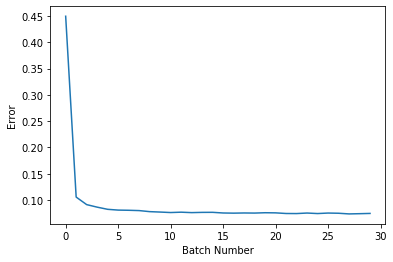

In [20]:
#parameters
epochs=5
batchsize=100
weights=[]
errors=[]

for epoch in range(epochs):
    for start,end in zip(range(0,len(trX),batchsize),range(batchsize,len(trX),batchsize)):
        batch = trX[start:end]
        cur_w=sess.run(update_w,feed_dict={v0_state:batch,w:prv_w,vb:prv_vb,hb:prv_hb})
        cur_vb=sess.run(update_vb,feed_dict={v0_state:batch,w:prv_w,vb:prv_vb,hb:prv_hb})
        cur_hb=sess.run(update_hb,feed_dict={v0_state:batch,w:prv_w,vb:prv_vb,hb:prv_hb})
        prv_w=cur_w
        prv_vb=cur_vb
        prv_hb=cur_hb
        if start %10000==0:
            errors.append(sess.run(err,feed_dict={v0_state:trX,w:prv_w,vb:prv_vb,hb:prv_hb}))
            weights.append(cur_w)
    print('Epoch: %d' % epoch,'reconstruction error: %f'%errors[-1])
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()

In [ ]:
#the final weights after training
uw=weights[-1].T
print(uw)

In [27]:
#learned features
title_raster_images(x=cur_w.T,img_shape=(28,28),tile_shape=(5,10),tile_spacing=(1,1))
image = IMaage.fromarray(tile_raster_images(x=cur_w.T,img_shape=(28,28),tile_shape=(5,10),tile_spacing=(1,1)))
plt.rcParams["Figure.fisize"]=(18.0,18.0)
imgplot=plt.imshow(image)
imgplot.set_cmap('gray')

NameError: name 'title_raster_images' is not defined